In [1]:
# Import the Required Packages
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
print('keras: ', keras.__version__)

keras:  2.10.0


## Step 1: Data Loading

In [2]:
import os
base_dir = 'C:\\Users\\Jammie99\\Desktop\\Folder\\Deep Learning\\Asg1'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

## Step 2:  Develop the Image Classification Models

### Model #1 - Baseline

In [3]:
# Build the Model
img_size = 150

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=0.001),
              metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 43808)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [4]:
# Train the Model
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

'''train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode = 'categorical')

history = model.fit(
      train_generator,
      steps_per_epoch=150,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=40)'''

"train_generator = train_datagen.flow_from_directory(\n        train_dir,\n        target_size=(img_size, img_size),\n        batch_size=50,\n        class_mode = 'categorical')\n\nvalidation_generator = test_datagen.flow_from_directory(\n        validation_dir,\n        target_size=(img_size, img_size),\n        batch_size=50,\n        class_mode = 'categorical')\n\nhistory = model.fit(\n      train_generator,\n      steps_per_epoch=150,\n      epochs=50,\n      validation_data=validation_generator,\n      validation_steps=40)"

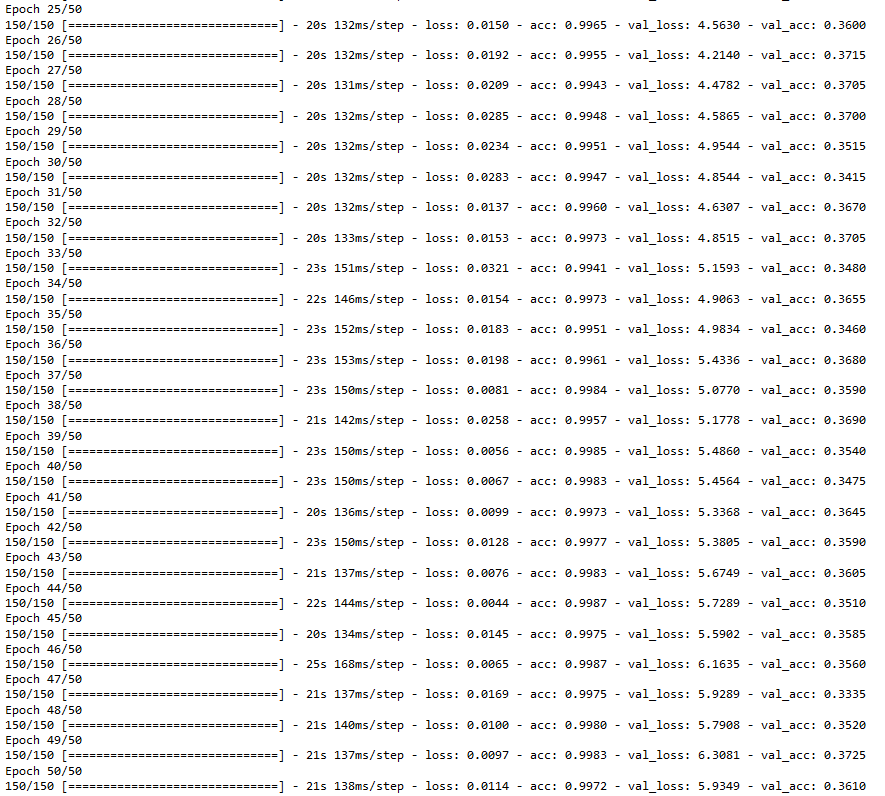

In [5]:
# Plot the Training and Validation Accuracy & Loss Scores
'''%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()'''

"%matplotlib inline\n\nacc = history.history['acc']\nval_acc = history.history['val_acc']\nloss = history.history['loss']\nval_loss = history.history['val_loss']\n\nepochs = range(len(acc))\n\nplt.plot(epochs, acc, 'bo', label='Training acc')\nplt.plot(epochs, val_acc, 'b', label='Validation acc')\nplt.title('Training and validation accuracy')\nplt.legend()\n\nplt.figure()\n\nplt.plot(epochs, loss, 'bo', label='Training loss')\nplt.plot(epochs, val_loss, 'b', label='Validation loss')\nplt.title('Training and validation loss')\nplt.legend()\n\nplt.show()"

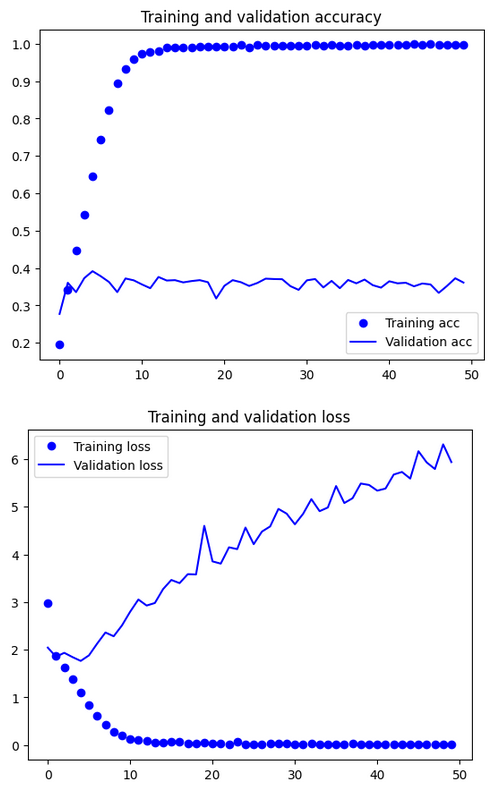

In [6]:
# Save the Model
#model.save('food_model_1.h5')

### Model #2

In [7]:
# Build the Model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 17, 17, 128)     

In [8]:
# Train the Model
'''train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode = 'categorical')

history = model.fit(
      train_generator,
      steps_per_epoch=150,
      epochs=150,
      validation_data=validation_generator,
      validation_steps=40)'''

"train_datagen = ImageDataGenerator(\n    rescale=1./255,\n    rotation_range=40,\n    width_shift_range=0.2,\n    height_shift_range=0.2,\n    shear_range=0.2,\n    zoom_range=0.2,\n    horizontal_flip=True,)\n\ntest_datagen = ImageDataGenerator(rescale=1./255)\n\ntrain_generator = train_datagen.flow_from_directory(\n        train_dir,\n        target_size=(img_size, img_size),\n        batch_size=50,\n        class_mode = 'categorical')\n\nvalidation_generator = test_datagen.flow_from_directory(\n        validation_dir,\n        target_size=(img_size, img_size),\n        batch_size=50,\n        class_mode = 'categorical')\n\nhistory = model.fit(\n      train_generator,\n      steps_per_epoch=150,\n      epochs=150,\n      validation_data=validation_generator,\n      validation_steps=40)"

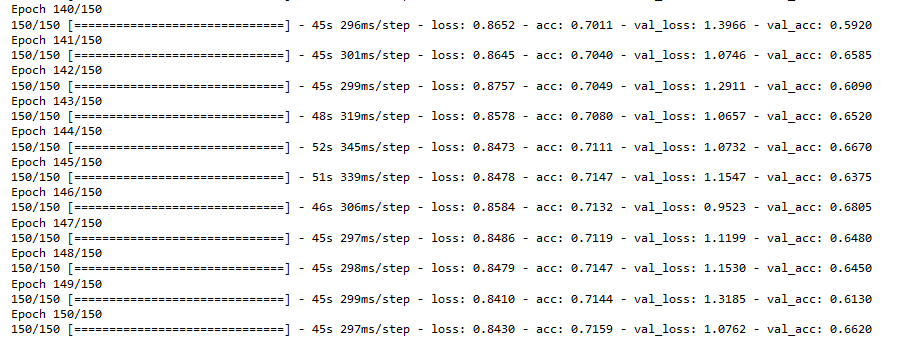

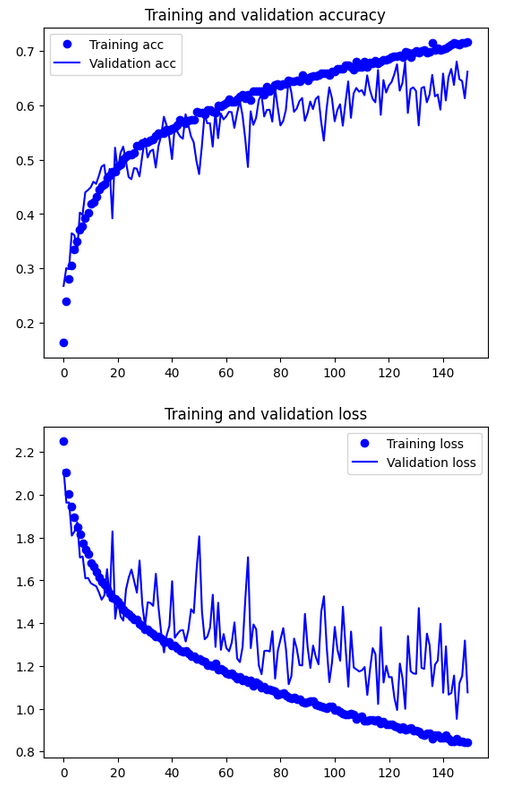

In [9]:
# Save the Model
#model.save('food_model_2.h5')

### Model #3

In [10]:
# Build the Model
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(2048, activation='relu'))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 conv2d_7 (Conv2D)           (None, 70, 70, 64)        36928     
                                                                 
 conv2d_8 (Conv2D)           (None, 68, 68, 256)       147712    
                                                                 
 conv2d_9 (Conv2D)           (None, 66, 66, 256)       590080    
                                                      

In [11]:
# Train the Model
'''train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode = 'categorical')

history = model.fit(
      train_generator,
      steps_per_epoch=150,
      epochs=150,
      validation_data=validation_generator,
      validation_steps=40)'''

"train_generator = train_datagen.flow_from_directory(\n        train_dir,\n        target_size=(img_size, img_size),\n        batch_size=50,\n        class_mode = 'categorical')\n\nvalidation_generator = test_datagen.flow_from_directory(\n        validation_dir,\n        target_size=(img_size, img_size),\n        batch_size=50,\n        class_mode = 'categorical')\n\nhistory = model.fit(\n      train_generator,\n      steps_per_epoch=150,\n      epochs=150,\n      validation_data=validation_generator,\n      validation_steps=40)"

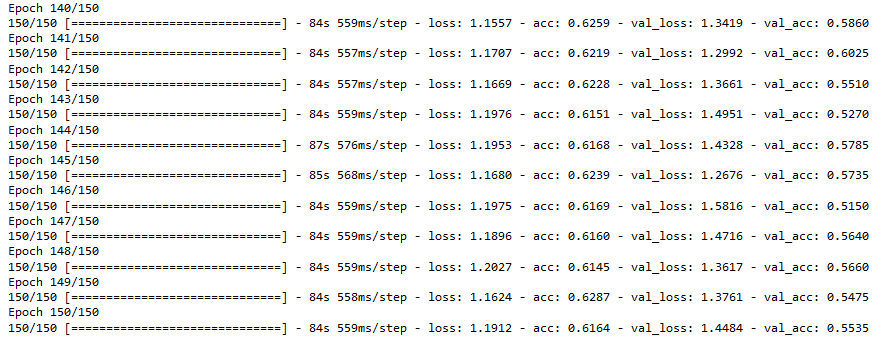

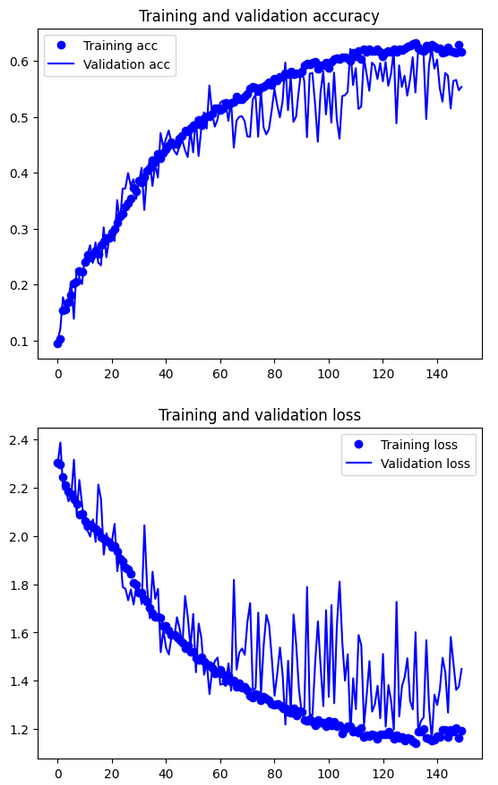

In [12]:
# Save the Model
#model.save('food_model_3.h5')

### Model #4

In [13]:
# Build the Model
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(86, (3, 3), activation='relu'))
model.add(layers.Conv2D(86, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(2048, activation='relu'))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.experimental.SGD(learning_rate=0.01),
              metrics=['acc'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 74, 74, 64)        0         
                                                                 
 conv2d_24 (Conv2D)          (None, 72, 72, 64)        36928     
                                                                 
 dropout_7 (Dropout)         (None, 72, 72, 64)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 70, 70, 86)        49622     
                                                      

In [14]:
# Train the Model
'''train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode = 'categorical')

history = model.fit(
      train_generator,
      steps_per_epoch=150,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=40)'''

"train_generator = train_datagen.flow_from_directory(\n        train_dir,\n        target_size=(img_size, img_size),\n        batch_size=50,\n        class_mode = 'categorical')\n\nvalidation_generator = test_datagen.flow_from_directory(\n        validation_dir,\n        target_size=(img_size, img_size),\n        batch_size=50,\n        class_mode = 'categorical')\n\nhistory = model.fit(\n      train_generator,\n      steps_per_epoch=150,\n      epochs=100,\n      validation_data=validation_generator,\n      validation_steps=40)"

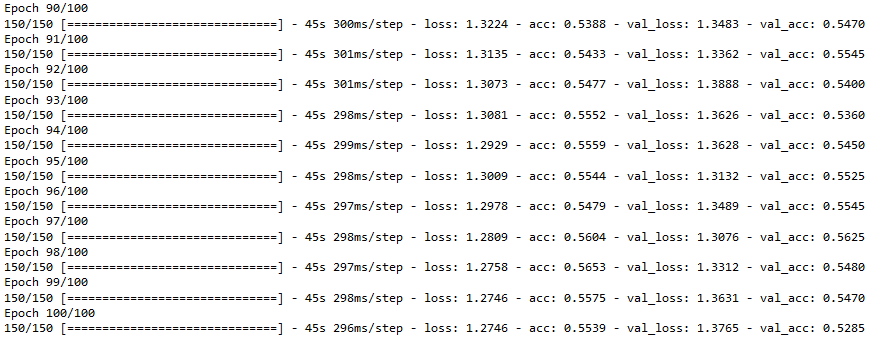

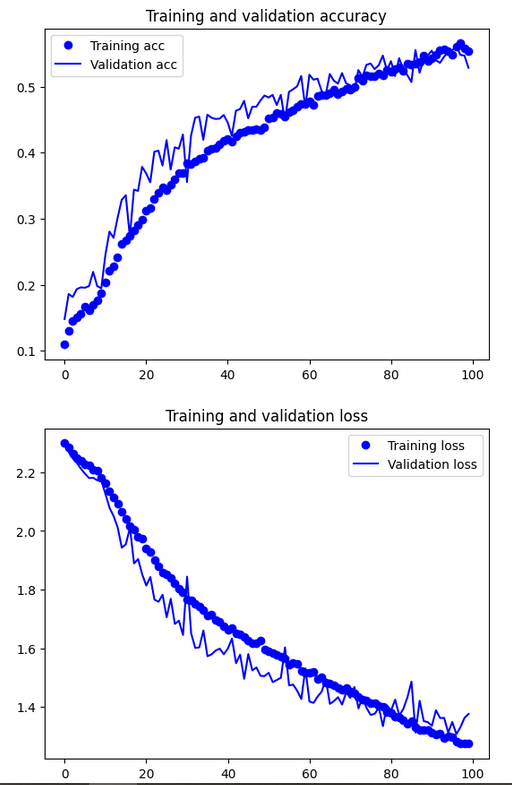

In [15]:
# Save the Model
#model.save('food_model_4.h5')

### Model #5

In [16]:
# Build the Model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.experimental.SGD(learning_rate=0.01),
              metrics=['acc'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 17, 17, 128)     

In [17]:
# Train the Model
'''train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode = 'categorical')

history = model.fit(
      train_generator,
      steps_per_epoch=375,
      epochs=150,
      validation_data=validation_generator,
      validation_steps=100)'''

"train_generator = train_datagen.flow_from_directory(\n        train_dir,\n        target_size=(img_size, img_size),\n        batch_size=20,\n        class_mode = 'categorical')\n\nvalidation_generator = test_datagen.flow_from_directory(\n        validation_dir,\n        target_size=(img_size, img_size),\n        batch_size=20,\n        class_mode = 'categorical')\n\nhistory = model.fit(\n      train_generator,\n      steps_per_epoch=375,\n      epochs=150,\n      validation_data=validation_generator,\n      validation_steps=100)"

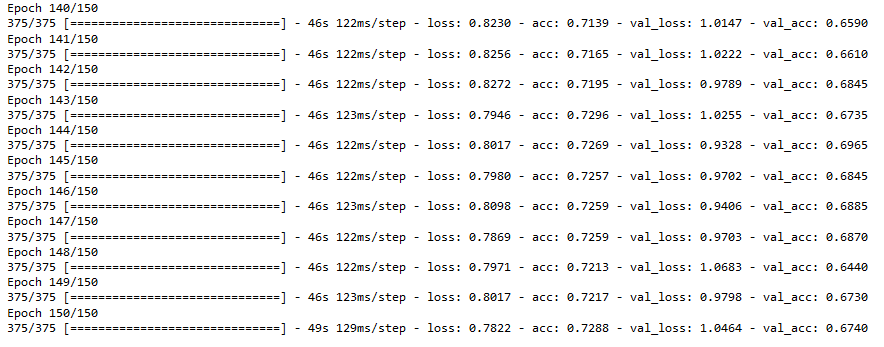

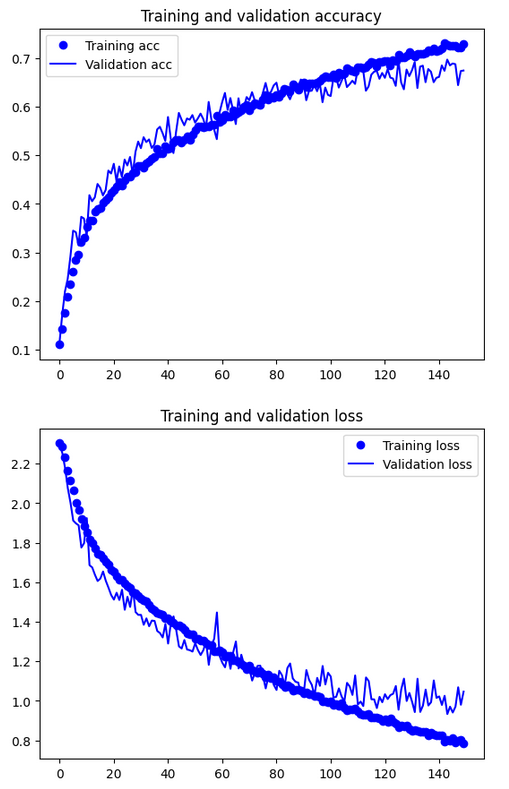

In [18]:
# Save the Model
#model.save('food_model_5.h5')

### Model #6

In [19]:
# Build the Model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.experimental.SGD(learning_rate=0.01),
              metrics=['acc'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 36, 36, 64)        0         
                                                                 
 conv2d_35 (Conv2D)          (None, 34, 34, 128)      

In [20]:
# Train the Model
'''train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode = 'categorical')

history = model.fit(
      train_generator,
      steps_per_epoch=300,
      epochs=150,
      validation_data=validation_generator,
      validation_steps=80)'''

"train_generator = train_datagen.flow_from_directory(\n        train_dir,\n        target_size=(img_size, img_size),\n        batch_size=25,\n        class_mode = 'categorical')\n\nvalidation_generator = test_datagen.flow_from_directory(\n        validation_dir,\n        target_size=(img_size, img_size),\n        batch_size=25,\n        class_mode = 'categorical')\n\nhistory = model.fit(\n      train_generator,\n      steps_per_epoch=300,\n      epochs=150,\n      validation_data=validation_generator,\n      validation_steps=80)"

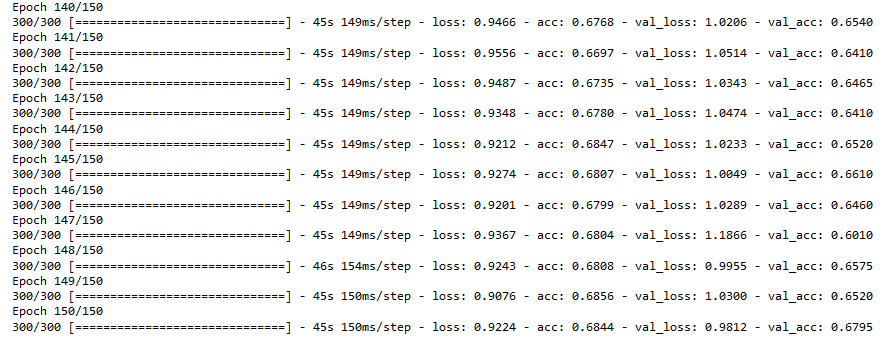

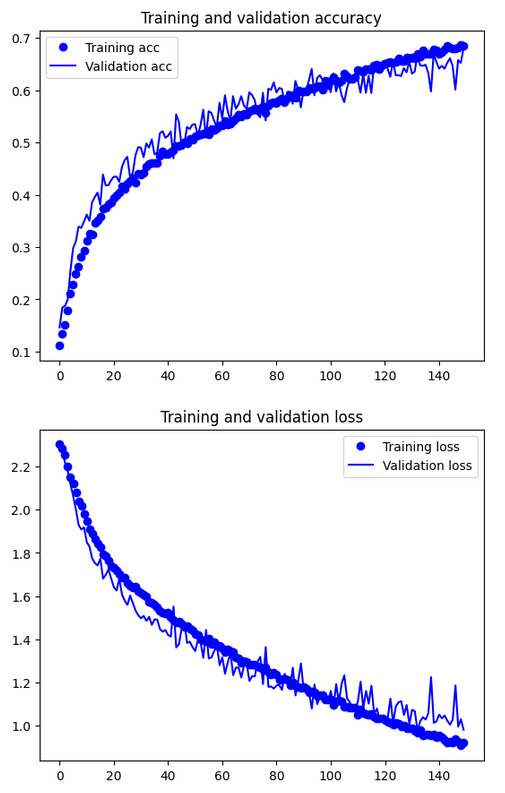

In [21]:
# Save the Model
#model.save('food_model_6.h5')

### Model #7

In [22]:
# Build the Model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.experimental.SGD(learning_rate=0.01),
              metrics=['acc'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 36, 36, 64)        0         
                                                                 
 conv2d_39 (Conv2D)          (None, 34, 34, 128)      

In [23]:
# Train the Model
'''train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=30,
        class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=30,
        class_mode = 'categorical')

history = model.fit(
      train_generator,
      steps_per_epoch=250,
      epochs=150,
      validation_data=validation_generator,
      validation_steps=66)'''

"train_generator = train_datagen.flow_from_directory(\n        train_dir,\n        target_size=(img_size, img_size),\n        batch_size=30,\n        class_mode = 'categorical')\n\nvalidation_generator = test_datagen.flow_from_directory(\n        validation_dir,\n        target_size=(img_size, img_size),\n        batch_size=30,\n        class_mode = 'categorical')\n\nhistory = model.fit(\n      train_generator,\n      steps_per_epoch=250,\n      epochs=150,\n      validation_data=validation_generator,\n      validation_steps=66)"

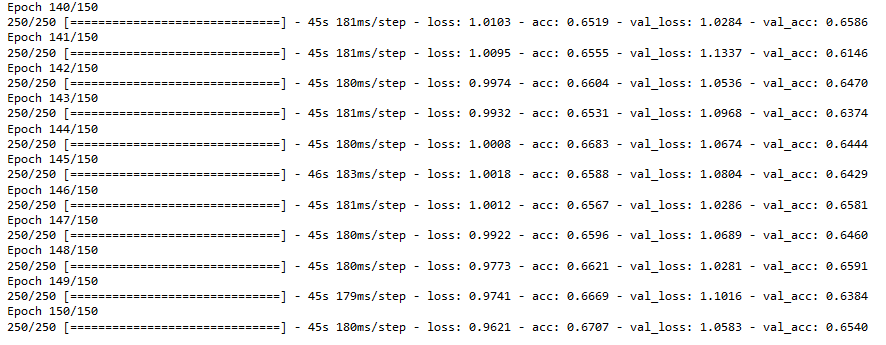

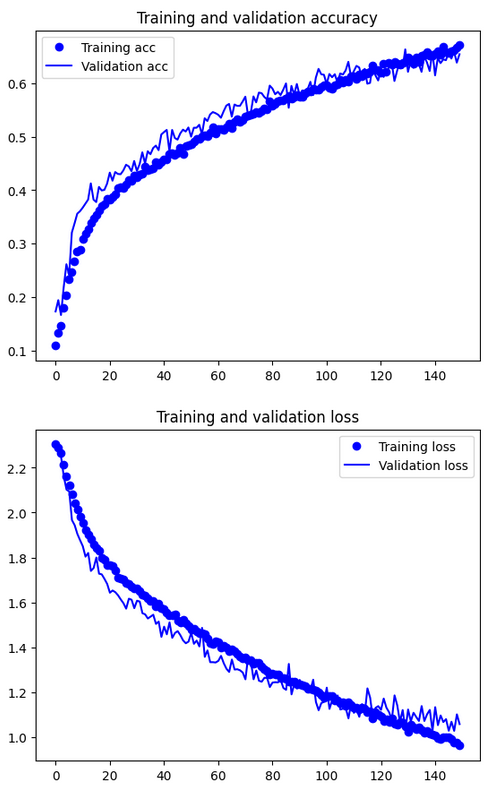

In [24]:
# Save the Model
#model.save('food_model_7.h5')

### Model #8

In [25]:
# Build the Model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.experimental.SGD(learning_rate=0.01),
              metrics=['acc'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 36, 36, 64)        0         
                                                                 
 conv2d_43 (Conv2D)          (None, 34, 34, 128)      

In [26]:
# Train the Model
'''train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=30,
        class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=30,
        class_mode = 'categorical')

history = model.fit(
      train_generator,
      steps_per_epoch=250,
      epochs=200,
      validation_data=validation_generator,
      validation_steps=66)'''

"train_generator = train_datagen.flow_from_directory(\n        train_dir,\n        target_size=(img_size, img_size),\n        batch_size=30,\n        class_mode = 'categorical')\n\nvalidation_generator = test_datagen.flow_from_directory(\n        validation_dir,\n        target_size=(img_size, img_size),\n        batch_size=30,\n        class_mode = 'categorical')\n\nhistory = model.fit(\n      train_generator,\n      steps_per_epoch=250,\n      epochs=200,\n      validation_data=validation_generator,\n      validation_steps=66)"

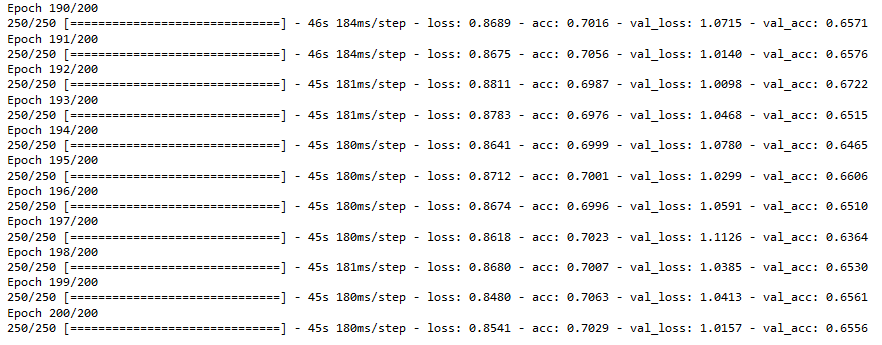

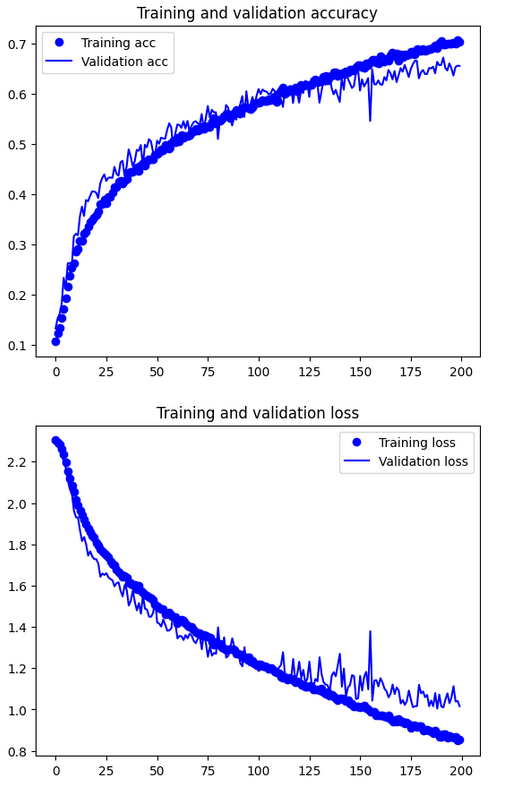

In [27]:
# Save the Model
#model.save('food_model_8.h5')

### Model #9

In [28]:
# Build the Model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.experimental.SGD(learning_rate=0.01),
              metrics=['acc'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 36, 36, 64)        0         
                                                                 
 conv2d_47 (Conv2D)          (None, 34, 34, 128)      

In [29]:
# Train the Model
'''train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode = 'categorical')

history = model.fit(
      train_generator,
      steps_per_epoch=300,
      epochs=150,
      validation_data=validation_generator,
      validation_steps=80)'''

"train_generator = train_datagen.flow_from_directory(\n        train_dir,\n        target_size=(img_size, img_size),\n        batch_size=25,\n        class_mode = 'categorical')\n\nvalidation_generator = test_datagen.flow_from_directory(\n        validation_dir,\n        target_size=(img_size, img_size),\n        batch_size=25,\n        class_mode = 'categorical')\n\nhistory = model.fit(\n      train_generator,\n      steps_per_epoch=300,\n      epochs=150,\n      validation_data=validation_generator,\n      validation_steps=80)"

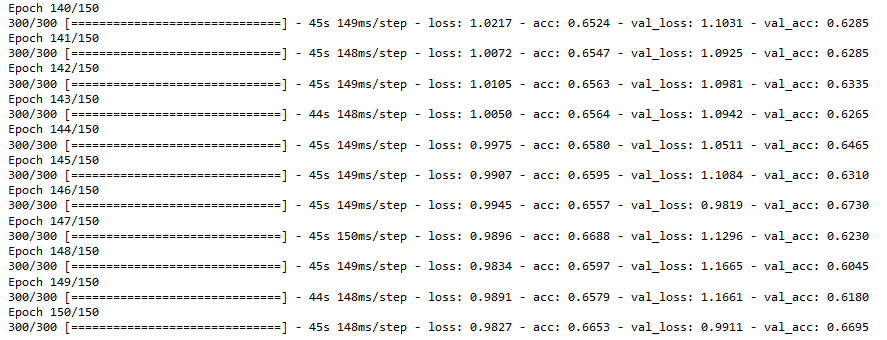

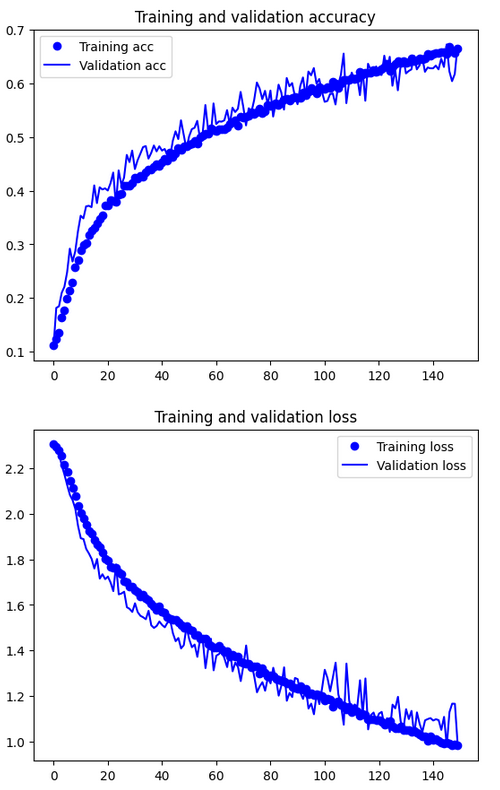

In [30]:
# Save the Model
#model.save('food_model_9.h5')

### Model #10

In [31]:
# Build the Model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.experimental.SGD(learning_rate=0.01),
              metrics=['acc'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 dropout_25 (Dropout)        (None, 36, 36, 64)        0         
                                                                 
 conv2d_51 (Conv2D)          (None, 34, 34, 128)      

In [32]:
# Train the Model
'''train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode = 'categorical')

history = model.fit(
      train_generator,
      steps_per_epoch=300,
      epochs=150,
      validation_data=validation_generator,
      validation_steps=80)'''

"train_generator = train_datagen.flow_from_directory(\n        train_dir,\n        target_size=(img_size, img_size),\n        batch_size=25,\n        class_mode = 'categorical')\n\nvalidation_generator = test_datagen.flow_from_directory(\n        validation_dir,\n        target_size=(img_size, img_size),\n        batch_size=25,\n        class_mode = 'categorical')\n\nhistory = model.fit(\n      train_generator,\n      steps_per_epoch=300,\n      epochs=150,\n      validation_data=validation_generator,\n      validation_steps=80)"

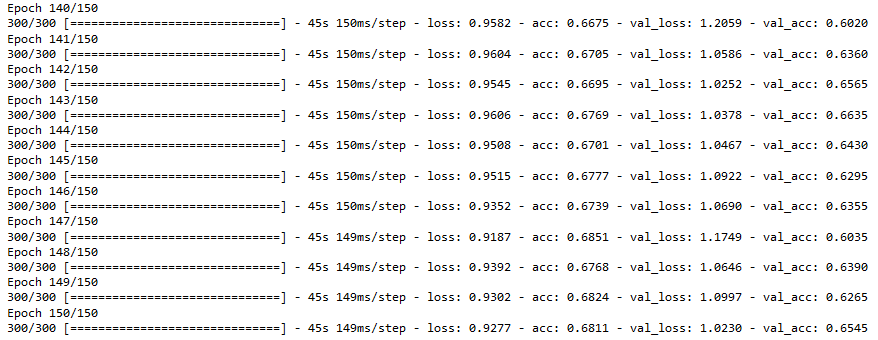

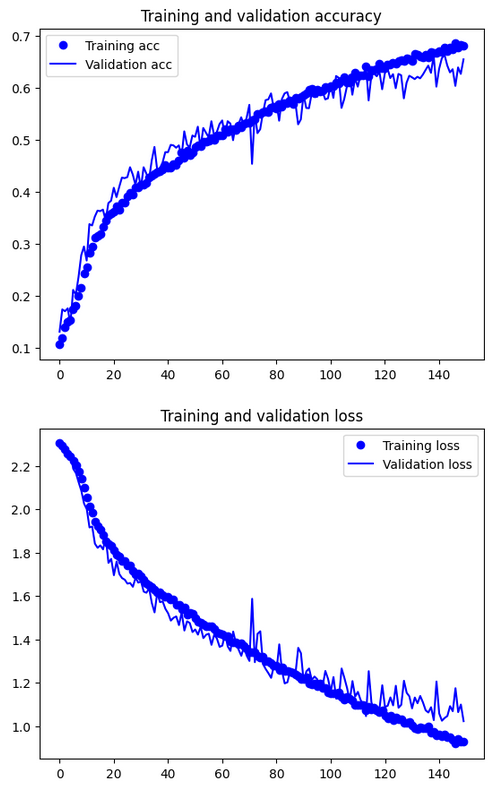

In [33]:
# Save the Model
#model.save('food_model_10.h5')

### Model #11

In [34]:
# Build the Model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.experimental.SGD(learning_rate=0.02),
              metrics=['acc'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_55 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 dropout_29 (Dropout)        (None, 36, 36, 64)        0         
                                                                 
 conv2d_56 (Conv2D)          (None, 34, 34, 128)     

In [35]:
# Train the Model
'''train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=30,
        class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=30,
        class_mode = 'categorical')

history = model.fit(
      train_generator,
      steps_per_epoch=250,
      epochs=150,
      validation_data=validation_generator,
      validation_steps=66)'''

"train_generator = train_datagen.flow_from_directory(\n        train_dir,\n        target_size=(img_size, img_size),\n        batch_size=30,\n        class_mode = 'categorical')\n\nvalidation_generator = test_datagen.flow_from_directory(\n        validation_dir,\n        target_size=(img_size, img_size),\n        batch_size=30,\n        class_mode = 'categorical')\n\nhistory = model.fit(\n      train_generator,\n      steps_per_epoch=250,\n      epochs=150,\n      validation_data=validation_generator,\n      validation_steps=66)"

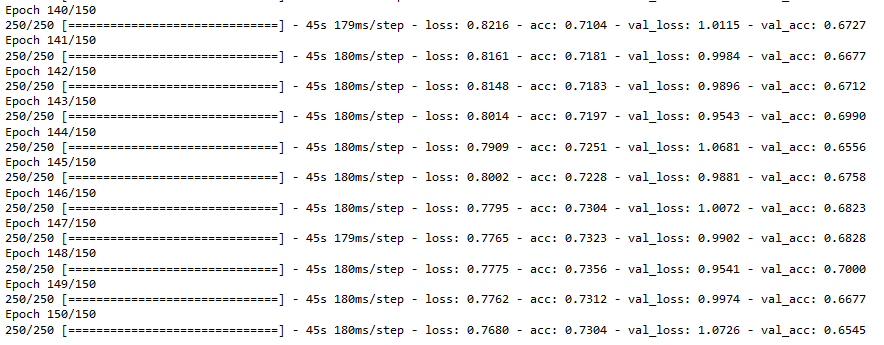

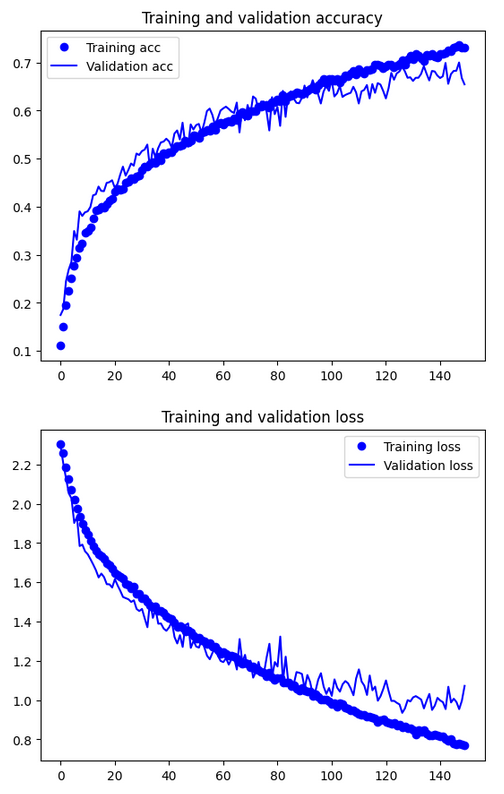

In [36]:
# Save the Model
#model.save('food_model_11.h5')

### Model #12

In [37]:
# Build the Model
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.experimental.SGD(learning_rate=0.01),
              metrics=['acc'])

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_58 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 conv2d_59 (Conv2D)          (None, 146, 146, 128)     73856     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 73, 73, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_60 (Conv2D)          (None, 71, 71, 128)       147584    
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 35, 35, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_61 (Conv2D)          (None, 33, 33, 256)     

In [38]:
# Train the Model
'''train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode = 'categorical')

history = model.fit(
      train_generator,
      steps_per_epoch=300,
      epochs=150,
      validation_data=validation_generator,
      validation_steps=80)'''

"train_generator = train_datagen.flow_from_directory(\n        train_dir,\n        target_size=(img_size, img_size),\n        batch_size=25,\n        class_mode = 'categorical')\n\nvalidation_generator = test_datagen.flow_from_directory(\n        validation_dir,\n        target_size=(img_size, img_size),\n        batch_size=25,\n        class_mode = 'categorical')\n\nhistory = model.fit(\n      train_generator,\n      steps_per_epoch=300,\n      epochs=150,\n      validation_data=validation_generator,\n      validation_steps=80)"

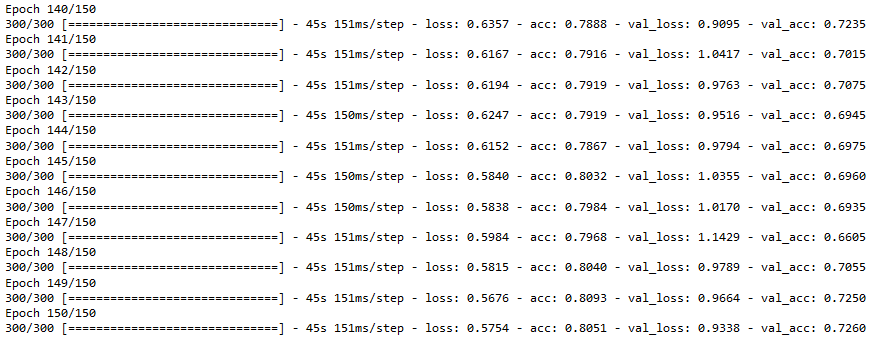

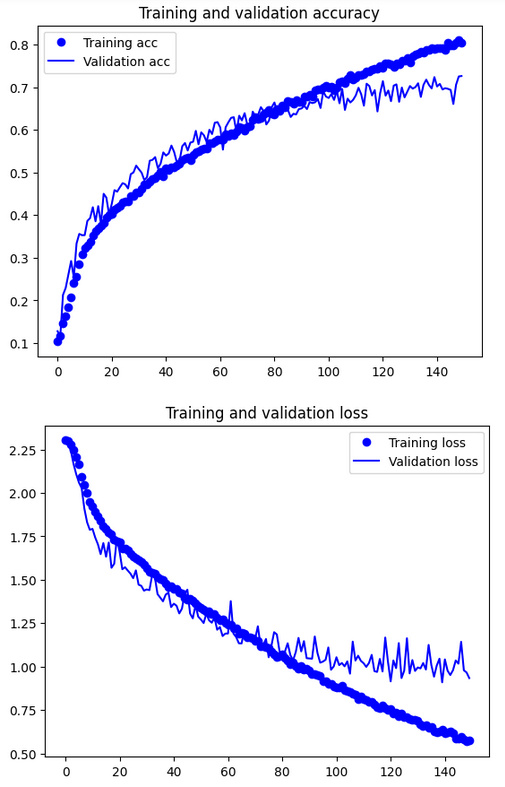

In [39]:
# Save the Model
#model.save('food_model_12.h5')

### Model #13

In [40]:
# Build the Model
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adagrad(learning_rate=0.01),
              metrics=['acc'])

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_63 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 conv2d_64 (Conv2D)          (None, 146, 146, 128)     73856     
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 73, 73, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_65 (Conv2D)          (None, 71, 71, 128)       147584    
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 35, 35, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_66 (Conv2D)          (None, 33, 33, 256)     

In [41]:
# Train the Model
'''train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode = 'categorical')

history = model.fit(
      train_generator,
      steps_per_epoch=300,
      epochs=150,
      validation_data=validation_generator,
      validation_steps=80)'''

"train_generator = train_datagen.flow_from_directory(\n        train_dir,\n        target_size=(img_size, img_size),\n        batch_size=25,\n        class_mode = 'categorical')\n\nvalidation_generator = test_datagen.flow_from_directory(\n        validation_dir,\n        target_size=(img_size, img_size),\n        batch_size=25,\n        class_mode = 'categorical')\n\nhistory = model.fit(\n      train_generator,\n      steps_per_epoch=300,\n      epochs=150,\n      validation_data=validation_generator,\n      validation_steps=80)"

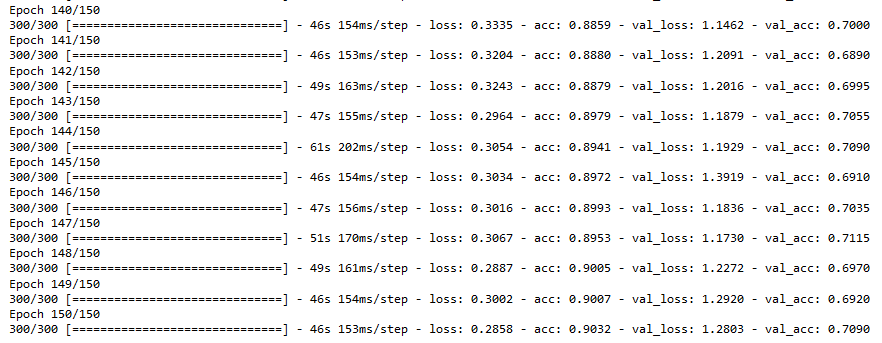

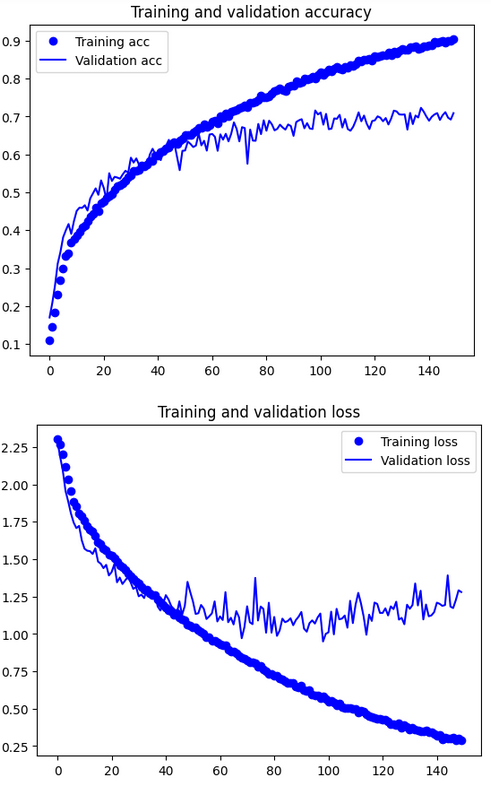

In [42]:
# Save the Model
#model.save('food_model_13.h5')

### Model #14

In [43]:
# Build the Model
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_13 (Flatten)        (None, 8192)              0         
                                                                 
 dense_30 (Dense)            (None, 256)               2097408   
                                                                 
 dense_31 (Dense)            (None, 10)                2570      
                                                                 
Total params: 16,814,666
Trainable params: 16,814,666
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Train the Model
'''train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

history = model.fit(
      train_generator,
      steps_per_epoch=375,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=100,
      verbose=1)'''

"train_generator = train_datagen.flow_from_directory(\n        train_dir,\n        target_size=(img_size, img_size),\n        batch_size=20,\n        class_mode='categorical')\n\nvalidation_generator = test_datagen.flow_from_directory(\n        validation_dir,\n        target_size=(img_size, img_size),\n        batch_size=20,\n        class_mode='categorical')\n\nhistory = model.fit(\n      train_generator,\n      steps_per_epoch=375,\n      epochs=10,\n      validation_data=validation_generator,\n      validation_steps=100,\n      verbose=1)"

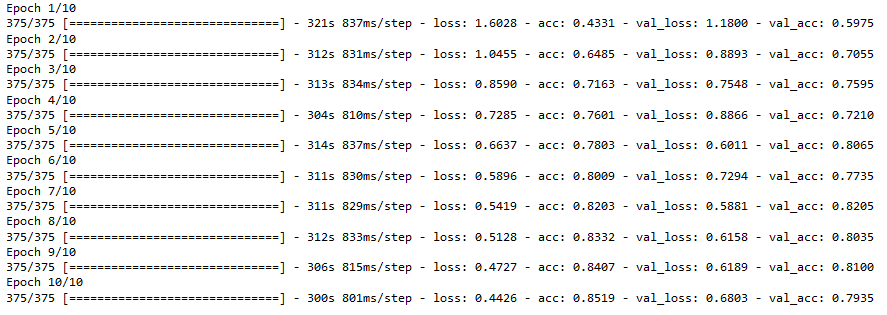

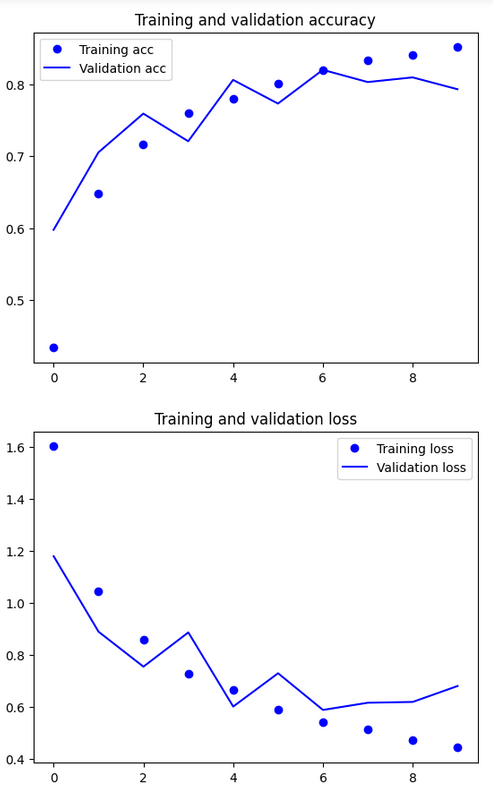

In [45]:
# Save the Model
#model.save('food_model_14.h5')

### Model #15

In [46]:
# Build the Model
from tensorflow.keras.applications import ResNet50

conv_base = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten_14 (Flatten)        (None, 51200)             0         
                                                                 
 dense_32 (Dense)            (None, 256)               13107456  
                                                                 
 dense_33 (Dense)            (None, 10)                2570      
                                                                 
Total params: 36,697,738
Trainable params: 36,644,618
Non-trainable params: 53,120
_________________________________________________________________


In [47]:
#Train the model
'''train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')

history = model.fit(
      train_generator,
      steps_per_epoch=300,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=80,
      verbose=1)'''

"train_generator = train_datagen.flow_from_directory(\n        train_dir,\n        target_size=(img_size, img_size),\n        batch_size=25,\n        class_mode='categorical')\n\nvalidation_generator = test_datagen.flow_from_directory(\n        validation_dir,\n        target_size=(img_size, img_size),\n        batch_size=25,\n        class_mode='categorical')\n\nhistory = model.fit(\n      train_generator,\n      steps_per_epoch=300,\n      epochs=10,\n      validation_data=validation_generator,\n      validation_steps=80,\n      verbose=1)"

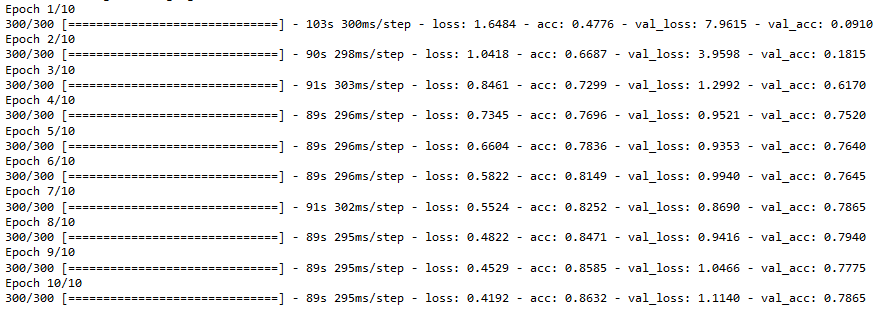

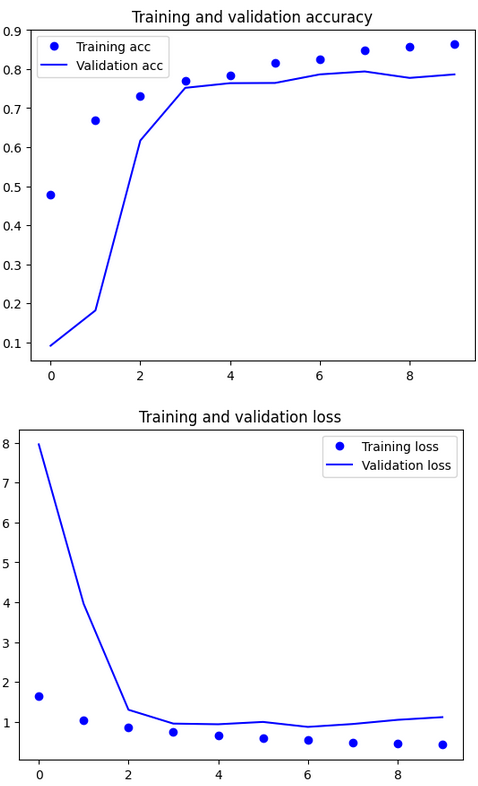

In [48]:
# Save the Model
#model.save('food_model_15.h5')

### Model #16

In [49]:
# Build the Model
from tensorflow.keras.applications import VGG19

conv_base = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=optimizers.experimental.SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten_15 (Flatten)        (None, 8192)              0         
                                                                 
 dense_34 (Dense)            (None, 256)               2097408   
                                                                 
 dense_35 (Dense)            (None, 10)                2570      
                                                                 
Total params: 22,124,362
Trainable params: 22,124,362
Non-trainable params: 0
_________________________________________________________________


In [50]:
#Train the model
'''train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')

history = model.fit(
      train_generator,
      steps_per_epoch=300,
      epochs=9,
      validation_data=validation_generator,
      validation_steps=80,
      verbose=1)'''

"train_generator = train_datagen.flow_from_directory(\n        train_dir,\n        target_size=(img_size, img_size),\n        batch_size=25,\n        class_mode='categorical')\n\nvalidation_generator = test_datagen.flow_from_directory(\n        validation_dir,\n        target_size=(img_size, img_size),\n        batch_size=25,\n        class_mode='categorical')\n\nhistory = model.fit(\n      train_generator,\n      steps_per_epoch=300,\n      epochs=9,\n      validation_data=validation_generator,\n      validation_steps=80,\n      verbose=1)"

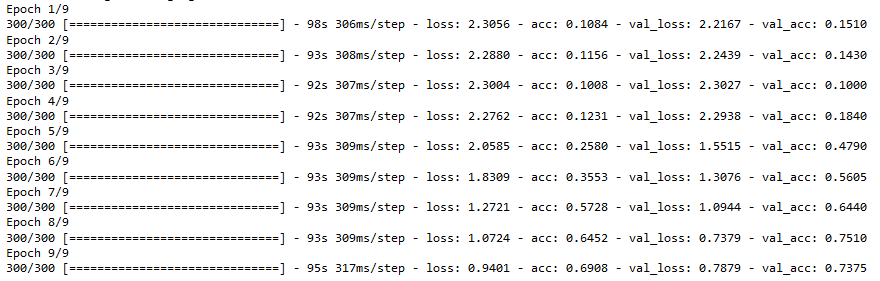

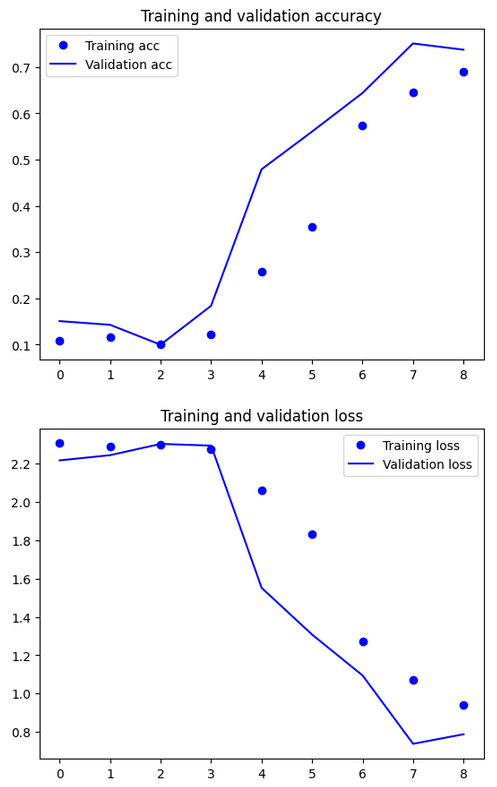

In [51]:
# Save the Model
#model.save('food_model_16.h5')

### Model #17

In [52]:
# Build the Model
from tensorflow.keras.applications import InceptionV3

conv_base = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=optimizers.Adagrad(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten_16 (Flatten)        (None, 18432)             0         
                                                                 
 dense_36 (Dense)            (None, 512)               9437696   
                                                                 
 dense_37 (Dense)            (None, 10)                5130      
                                                                 
Total params: 31,245,610
Trainable params: 31,211,178
Non-trainable params: 34,432
_________________________________________________________________


In [53]:
#Train the model
'''train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')

history = model.fit(
      train_generator,
      steps_per_epoch=300,
      epochs=9,
      validation_data=validation_generator,
      validation_steps=80,
      verbose=1)'''

"train_generator = train_datagen.flow_from_directory(\n        train_dir,\n        target_size=(img_size, img_size),\n        batch_size=25,\n        class_mode='categorical')\n\nvalidation_generator = test_datagen.flow_from_directory(\n        validation_dir,\n        target_size=(img_size, img_size),\n        batch_size=25,\n        class_mode='categorical')\n\nhistory = model.fit(\n      train_generator,\n      steps_per_epoch=300,\n      epochs=9,\n      validation_data=validation_generator,\n      validation_steps=80,\n      verbose=1)"

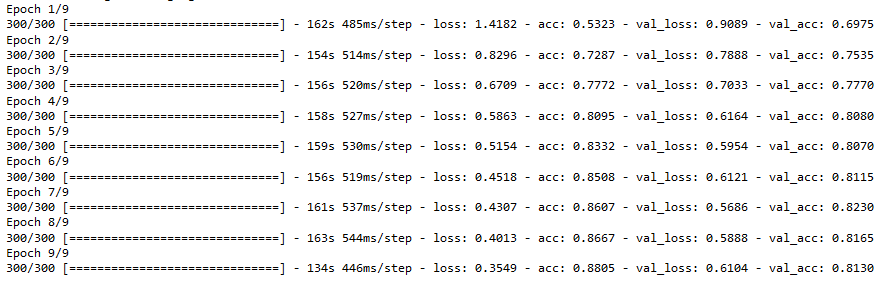

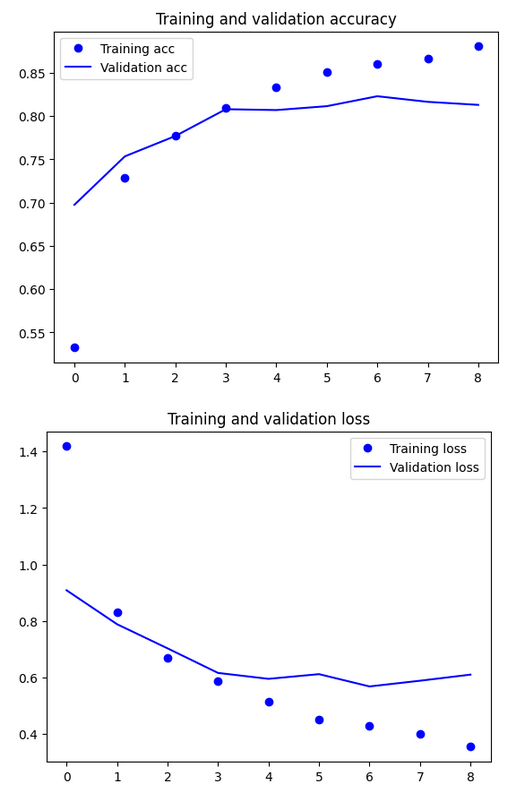

In [54]:
# Save the Model
#model.save('food_model_17.h5')

### Model #18

In [55]:
# Build the Model
conv_base = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

conv_base.trainable = False

model.compile(optimizer=optimizers.Adagrad(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten_17 (Flatten)        (None, 18432)             0         
                                                                 
 dense_38 (Dense)            (None, 512)               9437696   
                                                                 
 dense_39 (Dense)            (None, 10)                5130      
                                                                 
Total params: 31,245,610
Trainable params: 9,442,826
Non-trainable params: 21,802,784
_________________________________________________________________


In [56]:
#Train the model
'''train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')

history = model.fit(
      train_generator,
      steps_per_epoch=300,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=80,
      verbose=1)'''

"train_generator = train_datagen.flow_from_directory(\n        train_dir,\n        target_size=(img_size, img_size),\n        batch_size=25,\n        class_mode='categorical')\n\nvalidation_generator = test_datagen.flow_from_directory(\n        validation_dir,\n        target_size=(img_size, img_size),\n        batch_size=25,\n        class_mode='categorical')\n\nhistory = model.fit(\n      train_generator,\n      steps_per_epoch=300,\n      epochs=10,\n      validation_data=validation_generator,\n      validation_steps=80,\n      verbose=1)"

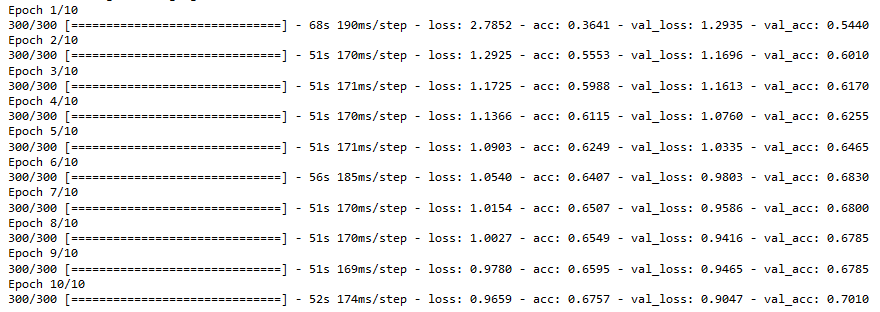

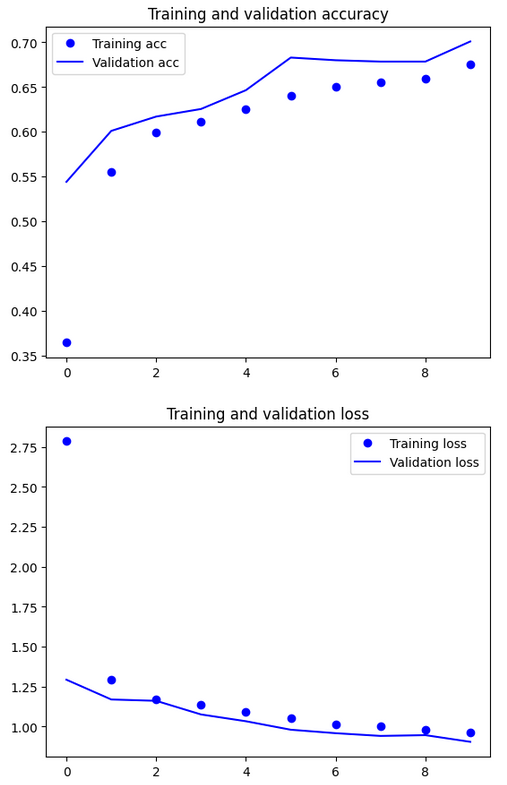

In [57]:
# Save the Model
#model.save('food_model_18.h5')

### Model #19

In [58]:
# Build the Model
conv_base = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block7_conv1':
        set_trainable = True # after black7_conv1, set_trainable becomes True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model.compile(optimizer=optimizers.Adagrad(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten_18 (Flatten)        (None, 18432)             0         
                                                                 
 dense_40 (Dense)            (None, 512)               9437696   
                                                                 
 dense_41 (Dense)            (None, 10)                5130      
                                                                 
Total params: 31,245,610
Trainable params: 9,442,826
Non-trainable params: 21,802,784
_________________________________________________________________


In [59]:
#Train the model
'''train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')

history = model.fit(
      train_generator,
      steps_per_epoch=300,
      epochs=25,
      validation_data=validation_generator,
      validation_steps=80,
      verbose=1)'''

"train_generator = train_datagen.flow_from_directory(\n        train_dir,\n        target_size=(img_size, img_size),\n        batch_size=25,\n        class_mode='categorical')\n\nvalidation_generator = test_datagen.flow_from_directory(\n        validation_dir,\n        target_size=(img_size, img_size),\n        batch_size=25,\n        class_mode='categorical')\n\nhistory = model.fit(\n      train_generator,\n      steps_per_epoch=300,\n      epochs=25,\n      validation_data=validation_generator,\n      validation_steps=80,\n      verbose=1)"

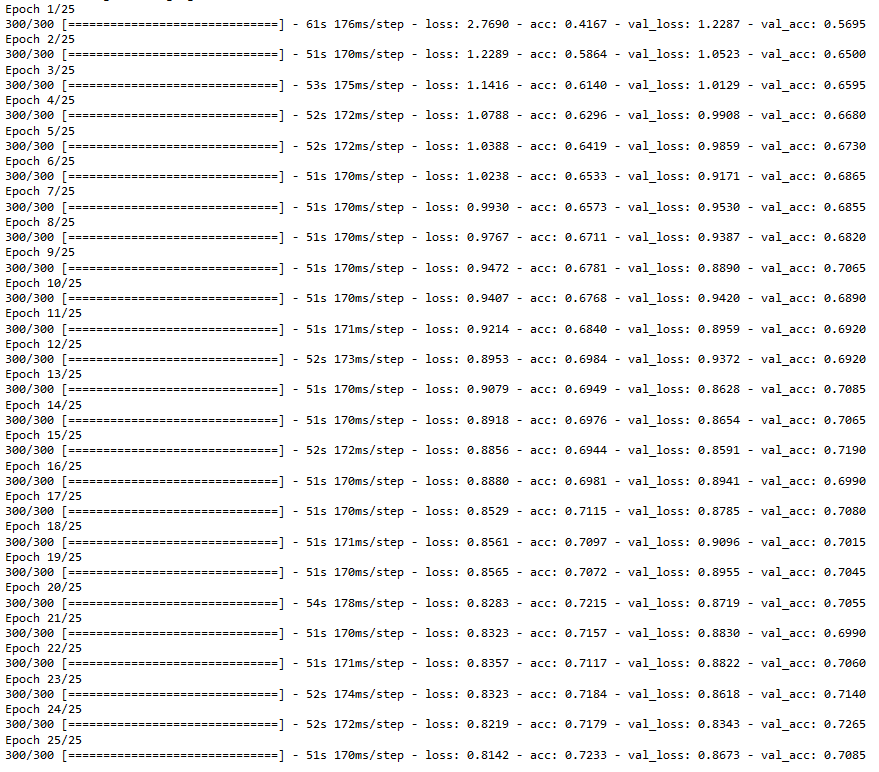

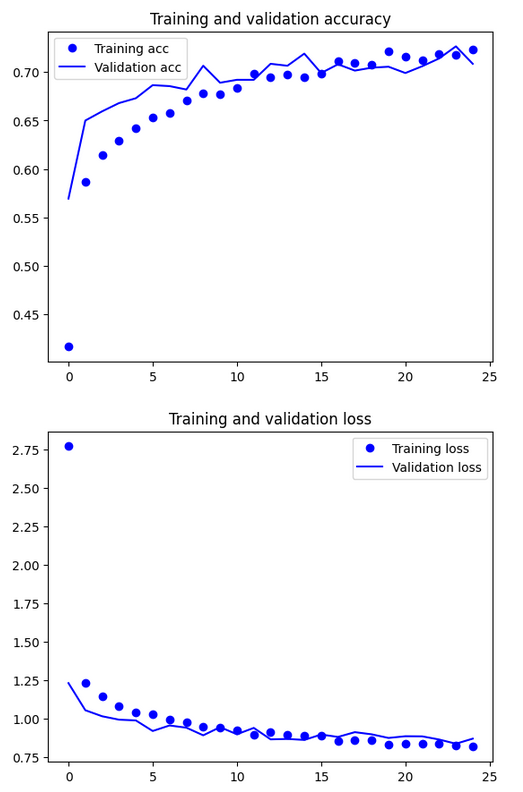

In [60]:
# Save the Model
#model.save('food_model_19.h5')

### Model #20

In [61]:
# Build the Model
conv_base = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=optimizers.Adagrad(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten_19 (Flatten)        (None, 18432)             0         
                                                                 
 dense_42 (Dense)            (None, 512)               9437696   
                                                                 
 dense_43 (Dense)            (None, 10)                5130      
                                                                 
Total params: 31,245,610
Trainable params: 31,211,178
Non-trainable params: 34,432
_________________________________________________________________


In [62]:
#Train the model
'''train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')

history = model.fit(
      train_generator,
      steps_per_epoch=300,
      epochs=25,
      validation_data=validation_generator,
      validation_steps=80,
      verbose=1)'''

"train_generator = train_datagen.flow_from_directory(\n        train_dir,\n        target_size=(img_size, img_size),\n        batch_size=25,\n        class_mode='categorical')\n\nvalidation_generator = test_datagen.flow_from_directory(\n        validation_dir,\n        target_size=(img_size, img_size),\n        batch_size=25,\n        class_mode='categorical')\n\nhistory = model.fit(\n      train_generator,\n      steps_per_epoch=300,\n      epochs=25,\n      validation_data=validation_generator,\n      validation_steps=80,\n      verbose=1)"

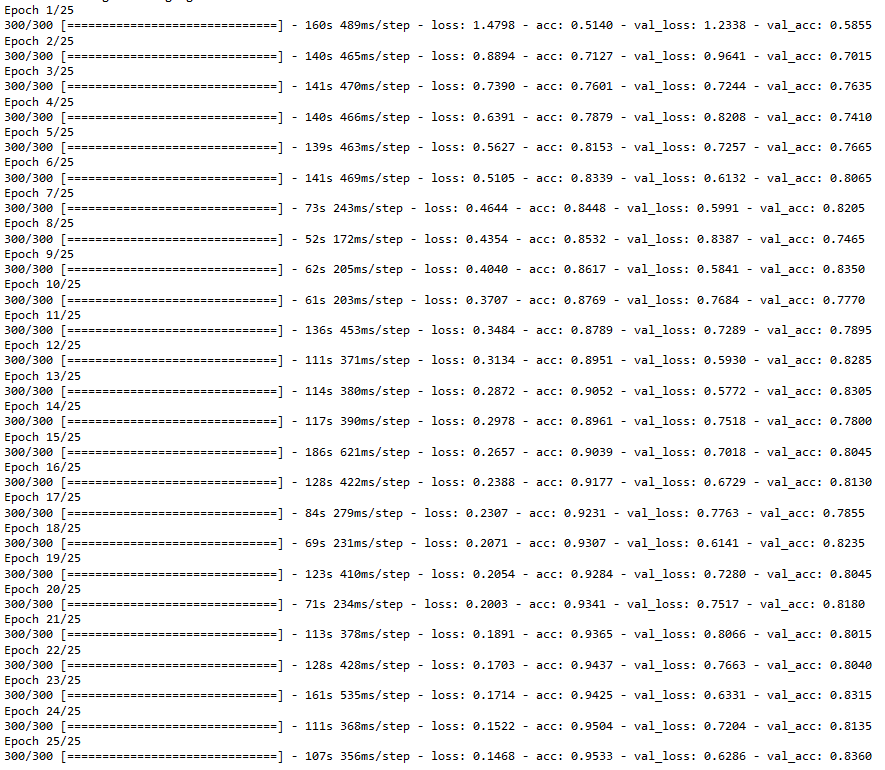

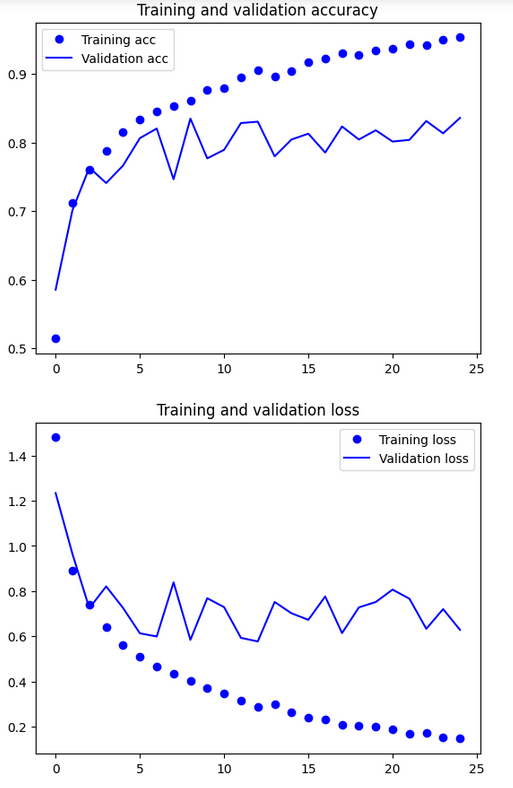

In [63]:
# Save the Model
#model.save('food_model_20.h5')

### Model #21

In [64]:
# Build the Model
conv_base = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block7_conv1':
        set_trainable = True # after black7_conv1, set_trainable becomes True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model.compile(optimizer=optimizers.Adagrad(learning_rate=0.015),
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten_20 (Flatten)        (None, 18432)             0         
                                                                 
 dense_44 (Dense)            (None, 512)               9437696   
                                                                 
 dense_45 (Dense)            (None, 10)                5130      
                                                                 
Total params: 31,245,610
Trainable params: 9,442,826
Non-trainable params: 21,802,784
_________________________________________________________________


In [65]:
#Train the model
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')

history = model.fit(
      train_generator,
      steps_per_epoch=300,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=80,
      verbose=1)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Epoch 1/50
300/300 [==============================] - 33s 80ms/step - loss: 3.8749 - acc: 0.4356 - val_loss: 1.2867 - val_acc: 0.5715
Epoch 2/50
300/300 [==============================] - 19s 63ms/step - loss: 1.0351 - acc: 0.6495 - val_loss: 1.1024 - val_acc: 0.6435
Epoch 3/50
300/300 [==============================] - 18s 62ms/step - loss: 0.8241 - acc: 0.7212 - val_loss: 0.9746 - val_acc: 0.6785
Epoch 4/50
300/300 [==============================] - 19s 62ms/step - loss: 0.6893 - acc: 0.7677 - val_loss: 0.9943 - val_acc: 0.6750
Epoch 5/50
300/300 [==============================] - 19s 64ms/step - loss: 0.5688 - acc: 0.8143 - val_loss: 1.0034 - val_acc: 0.6835
Epoch 6/50
300/300 [==============================] - 20s 65ms/step - loss: 0.4761 - acc: 0.8447 - val_loss: 0.9963 - val_acc: 0.6805
Epoch 7/50
300/300 [==============================] - 19s 63ms/step - loss: 0.3885 - acc: 0.8807 - val_loss: 1

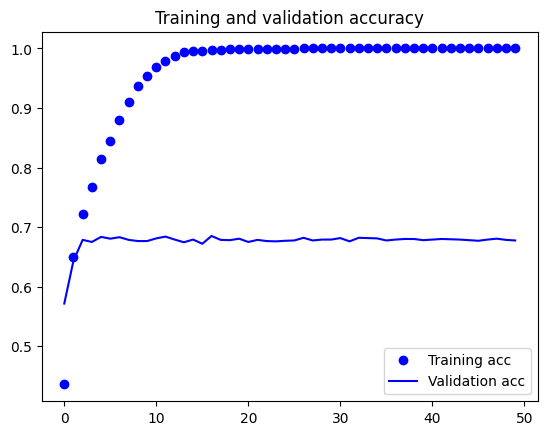

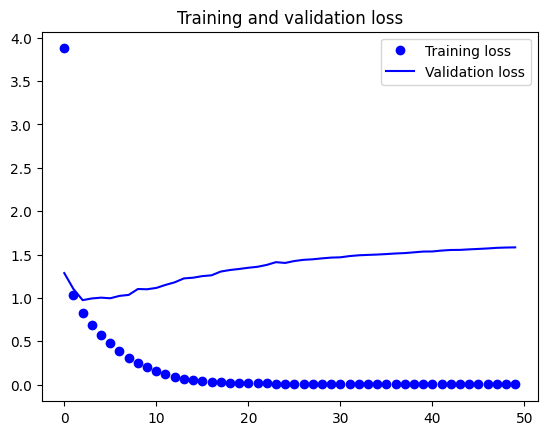

In [66]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [67]:
# Save the Model
model.save('food_model_21.h5')

## Step 3 – Evaluate the Developed Models using Testing Images

In [68]:
# Model #1
model1 = keras.models.load_model('food_model_1.h5')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

test_loss, test_acc = model1.evaluate(test_generator, steps=25)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
25/25 [==============================] - 1s 45ms/step - loss: 6.3959 - acc: 0.3500
test acc: 0.3499999940395355


In [69]:
# Model #2
model2 = keras.models.load_model('food_model_2.h5')

test_loss, test_acc = model2.evaluate(test_generator, steps=25)
print('test acc:', test_acc)

25/25 [==============================] - 1s 37ms/step - loss: 1.1334 - acc: 0.6740
test acc: 0.6740000247955322


In [70]:
# Model #3
model3 = keras.models.load_model('food_model_3.h5')

test_loss, test_acc = model3.evaluate(test_generator, steps=25)
print('test acc:', test_acc)

25/25 [==============================] - 10s 214ms/step - loss: 1.4582 - acc: 0.5540
test acc: 0.5540000200271606


In [71]:
# Model #4
model4 = keras.models.load_model('food_model_4.h5')

test_loss, test_acc = model4.evaluate(test_generator, steps=25)
print('test acc:', test_acc)

25/25 [==============================] - 2s 55ms/step - loss: 1.3701 - acc: 0.5320
test acc: 0.5320000052452087


In [72]:
# Model #5
model5 = keras.models.load_model('food_model_5.h5')

test_loss, test_acc = model5.evaluate(test_generator, steps=25)
print('test acc:', test_acc)

25/25 [==============================] - 1s 37ms/step - loss: 1.0372 - acc: 0.6660
test acc: 0.6660000085830688


In [73]:
# Model #6
model6 = keras.models.load_model('food_model_6.h5')

test_loss, test_acc = model6.evaluate(test_generator, steps=25)
print('test acc:', test_acc)

25/25 [==============================] - 1s 37ms/step - loss: 0.9898 - acc: 0.6780
test acc: 0.6779999732971191


In [74]:
# Model #7
model7 = keras.models.load_model('food_model_7.h5')

test_loss, test_acc = model7.evaluate(test_generator, steps=25)
print('test acc:', test_acc)

25/25 [==============================] - 1s 37ms/step - loss: 1.0886 - acc: 0.6340
test acc: 0.6340000033378601


In [75]:
# Model #8
model8 = keras.models.load_model('food_model_8.h5')

test_loss, test_acc = model8.evaluate(test_generator, steps=25)
print('test acc:', test_acc)

25/25 [==============================] - 1s 38ms/step - loss: 1.0068 - acc: 0.6720
test acc: 0.671999990940094


In [76]:
# Model #9
model9 = keras.models.load_model('food_model_9.h5')

test_loss, test_acc = model9.evaluate(test_generator, steps=25)
print('test acc:', test_acc)

25/25 [==============================] - 1s 38ms/step - loss: 0.9970 - acc: 0.6600
test acc: 0.6600000262260437


In [77]:
# Model #10
model10 = keras.models.load_model('food_model_10.h5')

test_loss, test_acc = model10.evaluate(test_generator, steps=25)
print('test acc:', test_acc)

25/25 [==============================] - 1s 37ms/step - loss: 1.0328 - acc: 0.6640
test acc: 0.6639999747276306


In [78]:
# Model #11
model11 = keras.models.load_model('food_model_11.h5')

test_loss, test_acc = model11.evaluate(test_generator, steps=25)
print('test acc:', test_acc)

25/25 [==============================] - 1s 38ms/step - loss: 1.0978 - acc: 0.6400
test acc: 0.6399999856948853


In [79]:
# Model #12
model12 = keras.models.load_model('food_model_12.h5')

test_loss, test_acc = model12.evaluate(test_generator, steps=25)
print('test acc:', test_acc)

25/25 [==============================] - 5s 111ms/step - loss: 0.9320 - acc: 0.7280
test acc: 0.7279999852180481


In [80]:
# Model #13
model13 = keras.models.load_model('food_model_13.h5')

test_loss, test_acc = model13.evaluate(test_generator, steps=25)
print('test acc:', test_acc)

25/25 [==============================] - 3s 110ms/step - loss: 1.2119 - acc: 0.7220
test acc: 0.722000002861023


In [81]:
# Model #14
model14 = keras.models.load_model('food_model_14.h5')

test_loss, test_acc = model14.evaluate(test_generator, steps=25)
print('test acc:', test_acc)

25/25 [==============================] - 9s 219ms/step - loss: 0.6957 - acc: 0.7800
test acc: 0.7799999713897705


In [82]:
# Model #15
model15 = keras.models.load_model('food_model_15.h5')

test_loss, test_acc = model15.evaluate(test_generator, steps=25)
print('test acc:', test_acc)

25/25 [==============================] - 8s 204ms/step - loss: 1.1581 - acc: 0.7780
test acc: 0.777999997138977


In [83]:
# Model #16
model16 = keras.models.load_model('food_model_16.h5')

test_loss, test_acc = model16.evaluate(test_generator, steps=25)
print('test acc:', test_acc)

25/25 [==============================] - 7s 276ms/step - loss: 0.7914 - acc: 0.7460
test acc: 0.7459999918937683


In [84]:
# Model #17
model17 = keras.models.load_model('food_model_17.h5')

test_loss, test_acc = model17.evaluate(test_generator, steps=25)
print('test acc:', test_acc)

25/25 [==============================] - 6s 97ms/step - loss: 0.7143 - acc: 0.7880
test acc: 0.7879999876022339


In [85]:
# Model #18
model18 = keras.models.load_model('food_model_18.h5')

test_loss, test_acc = model18.evaluate(test_generator, steps=25)
print('test acc:', test_acc)

25/25 [==============================] - 4s 97ms/step - loss: 0.9149 - acc: 0.7040
test acc: 0.7039999961853027


In [86]:
# Model #19
model19 = keras.models.load_model('food_model_19.h5')

test_loss, test_acc = model19.evaluate(test_generator, steps=25)
print('test acc:', test_acc)

25/25 [==============================] - 4s 98ms/step - loss: 0.9235 - acc: 0.7000
test acc: 0.699999988079071


In [87]:
# Model #20
model20 = keras.models.load_model('food_model_20.h5')

test_loss, test_acc = model20.evaluate(test_generator, steps=25)
print('test acc:', test_acc)

25/25 [==============================] - 4s 98ms/step - loss: 0.5428 - acc: 0.8420
test acc: 0.8420000076293945


In [88]:
# Model #21
model21 = keras.models.load_model('food_model_21.h5')

test_loss, test_acc = model21.evaluate(test_generator, steps=25)
print('test acc:', test_acc)

25/25 [==============================] - 4s 100ms/step - loss: 1.6146 - acc: 0.6680
test acc: 0.6679999828338623


In [89]:
# Save the best model
modelbest = model20
modelbest.save('food_model_best.h5')

## Step 4  – Use the best model to make prediction

In [90]:
# Load the model
model = keras.models.load_model('food_model_best.h5')

In [91]:
# Load the food list (in alphabetical order)
with open('20.txt', 'r') as f: # the .txt file which contains a list of food assigned to you
    x = f.readlines()
food_list =[]
for item in x:
    food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

['beef_carpaccio', 'chicken_quesadilla', 'club_sandwich', 'escargots', 'greek_salad', 'grilled_salmon', 'gyoza', 'pizza', 'prime_rib', 'steak']


In [93]:
# Define some related functions for image process and model prediction
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

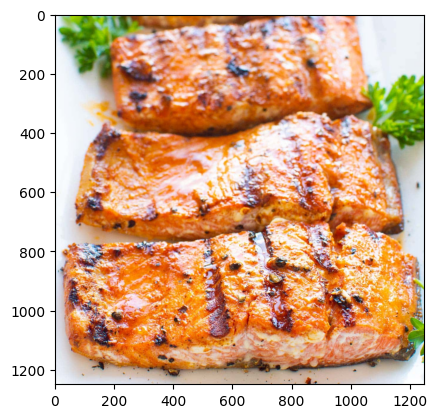

1/1 [==============================] - 0s 30ms/step
The prediction is:  grilled_salmon 

    beef_carpaccio  chicken_quesadilla  club_sandwich     escargots  \
0        0.000001            0.000005        0.00003  5.408966e-07   

   greek_salad  grilled_salmon         gyoza     pizza  prime_rib     steak  
0     0.000002         0.99964  9.200102e-07  0.000039   0.000011  0.000269  


In [96]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
import numpy as np
img = 'grilledsalmon.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

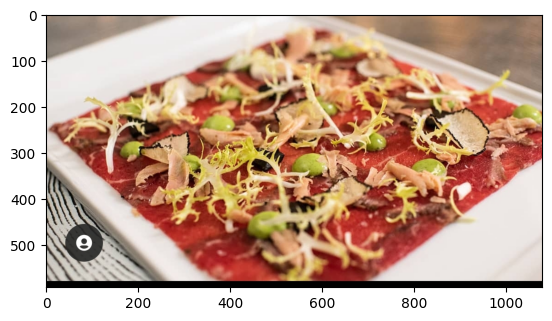

1/1 [==============================] - 0s 36ms/step
The prediction is:  beef_carpaccio 

    beef_carpaccio  chicken_quesadilla  club_sandwich  escargots   greek_salad  \
0        0.983941            0.000002   5.824079e-08   0.000004  3.021828e-07   

   grilled_salmon     gyoza     pizza  prime_rib     steak  
0        0.000002  0.000004  0.016038   0.000003  0.000006  


In [97]:
img = 'beef_carpaccio.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

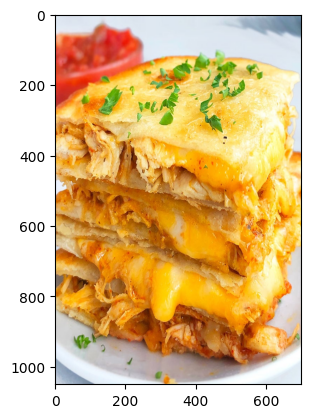

1/1 [==============================] - 0s 30ms/step
The prediction is:  chicken_quesadilla 

    beef_carpaccio  chicken_quesadilla  club_sandwich  escargots  greek_salad  \
0        0.005745            0.550343       0.029578   0.032597     0.000168   

   grilled_salmon    gyoza     pizza  prime_rib     steak  
0        0.077063  0.28836  0.001144   0.002107  0.012895  


In [107]:
img = 'chicken_quesadilla.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

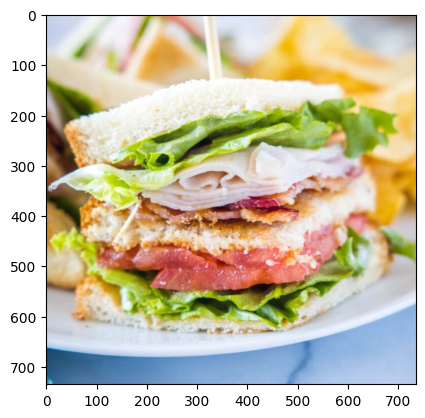

1/1 [==============================] - 0s 32ms/step
The prediction is:  club_sandwich 

    beef_carpaccio  chicken_quesadilla  club_sandwich     escargots  \
0        0.001666            0.000264       0.904227  7.491282e-07   

   greek_salad  grilled_salmon         gyoza     pizza  prime_rib     steak  
0     0.092988        0.000778  7.914921e-07  0.000004   0.000035  0.000035  


In [99]:
img = 'club_sandwich.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

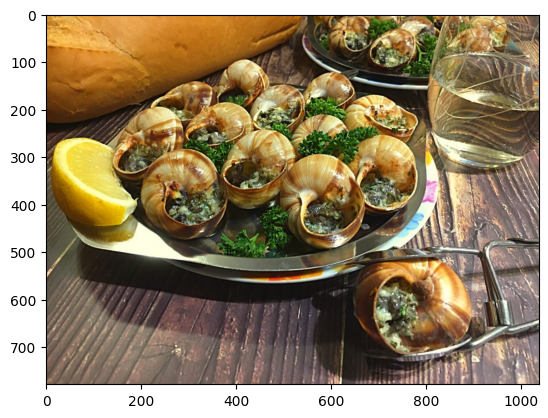

1/1 [==============================] - 0s 35ms/step
The prediction is:  escargots 

    beef_carpaccio  chicken_quesadilla  club_sandwich  escargots   greek_salad  \
0    9.046139e-09        6.300292e-09   2.820734e-10   0.999994  2.954596e-08   

   grilled_salmon     gyoza         pizza     prime_rib     steak  
0    2.057930e-07  0.000002  5.446098e-07  7.538428e-07  0.000003  


In [100]:
img = 'escargots.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

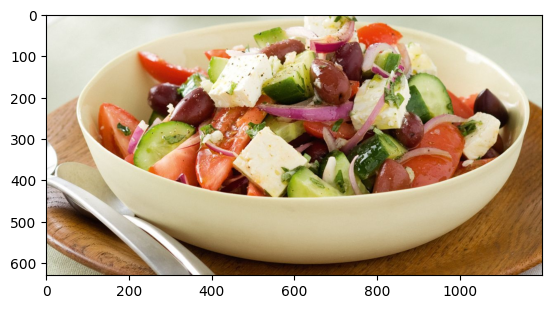

1/1 [==============================] - 0s 37ms/step
The prediction is:  greek_salad 

    beef_carpaccio  chicken_quesadilla  club_sandwich     escargots  \
0        0.000001            0.000018       0.000001  3.865701e-08   

   greek_salad  grilled_salmon     gyoza         pizza     prime_rib  \
0     0.999974    2.206156e-07  0.000004  5.769573e-07  9.300469e-09   

          steak  
0  1.128456e-08  


In [102]:
img = 'greek_salad.jpeg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

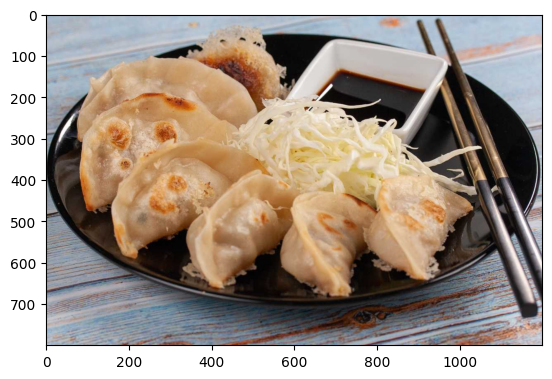

1/1 [==============================] - 0s 33ms/step
The prediction is:  gyoza 

    beef_carpaccio  chicken_quesadilla  club_sandwich  escargots   greek_salad  \
0    1.041270e-08        3.316645e-07   3.799701e-08   0.000002  6.869234e-09   

   grilled_salmon     gyoza         pizza     prime_rib         steak  
0    9.676356e-08  0.999996  9.135024e-08  2.590365e-07  9.020995e-07  


In [103]:
img = 'gyoza.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

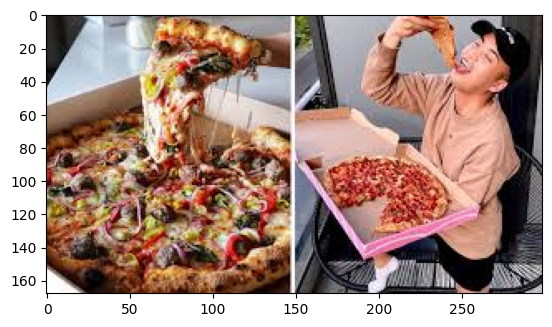

1/1 [==============================] - 0s 34ms/step
The prediction is:  pizza 

    beef_carpaccio  chicken_quesadilla  club_sandwich  escargots  greek_salad  \
0        0.186886            0.145687       0.088484   0.000452     0.002847   

   grilled_salmon     gyoza     pizza  prime_rib     steak  
0        0.001457  0.008459  0.300941   0.237719  0.027067  


In [104]:
img = 'pizza.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

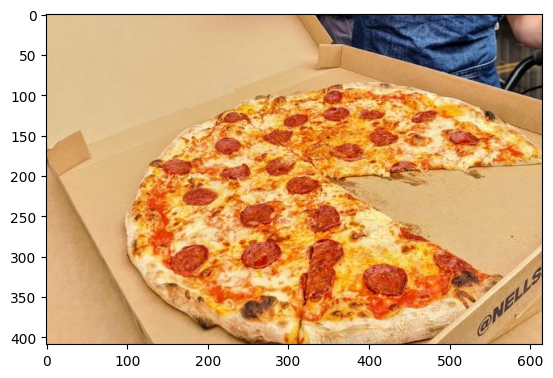

1/1 [==============================] - 0s 36ms/step
The prediction is:  pizza 

    beef_carpaccio  chicken_quesadilla  club_sandwich     escargots  \
0        0.000002            0.000017   8.798136e-09  6.961455e-08   

    greek_salad  grilled_salmon         gyoza    pizza     prime_rib  \
0  2.196254e-09    9.277020e-07  1.203885e-07  0.99998  3.473676e-08   

          steak  
0  5.356688e-07  


In [112]:
img = 'pizza2.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

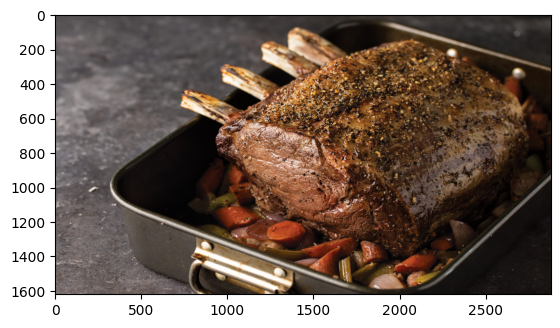

1/1 [==============================] - 0s 32ms/step
The prediction is:  prime_rib 

    beef_carpaccio  chicken_quesadilla  club_sandwich  escargots   greek_salad  \
0        0.000032            0.000024       0.000348   0.000059  6.742962e-07   

   grilled_salmon     gyoza     pizza  prime_rib    steak  
0        0.002193  0.001576  0.000865   0.929282  0.06562  


In [108]:
img = 'prime_rib.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

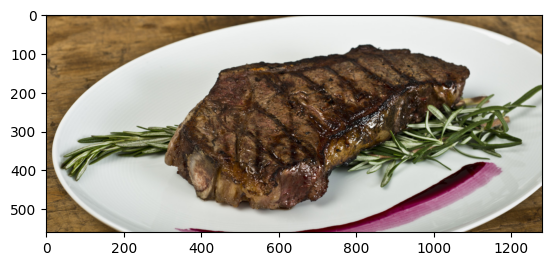

1/1 [==============================] - 0s 31ms/step
The prediction is:  steak 

    beef_carpaccio  chicken_quesadilla  club_sandwich     escargots  \
0    1.186906e-07        7.258316e-08   1.355000e-08  2.043219e-07   

    greek_salad  grilled_salmon         gyoza         pizza  prime_rib  \
0  8.456669e-11        0.001124  6.982890e-08  9.942404e-08   0.000037   

      steak  
0  0.998838  


In [106]:
img = 'steak.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)